In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from pandas.tseries.offsets import DateOffset

In [4]:
# Loading the files to Dataframes
CompleteSales=pd.read_csv("E:/Data/Sales.csv")
# CompleteOrders=pd.read_csv("E:/Data/Orders.csv")
# Products=pd.read_csv("E:/Data/Products.csv",encoding='latin-1')
# Category=pd.read_csv("E:/Data/Category.csv")
# Design=pd.read_csv("E:/Data/Design.csv")
# Type=pd.read_csv("E:/Data/Type.csv")
# Ruling=pd.read_csv("E:/Data/Ruling.csv")

#Checking the files
print(CompleteSales.columns)

Index(['Sales_no', 'Sales_date', 'Product_id', 'Category_name',
       'CategoryDesign_name', 'Type_name', 'Ruling_name', 'Qty_Sold',
       'Total_Sales_Value', 'Zone_name'],
      dtype='object')


       Date  Sales
0  01-01-17   7871
1  01-01-17   8830
2  01-01-17   2843
3  01-01-17   9790
4  01-01-17   6737


C:\Users\Manimaran KV\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


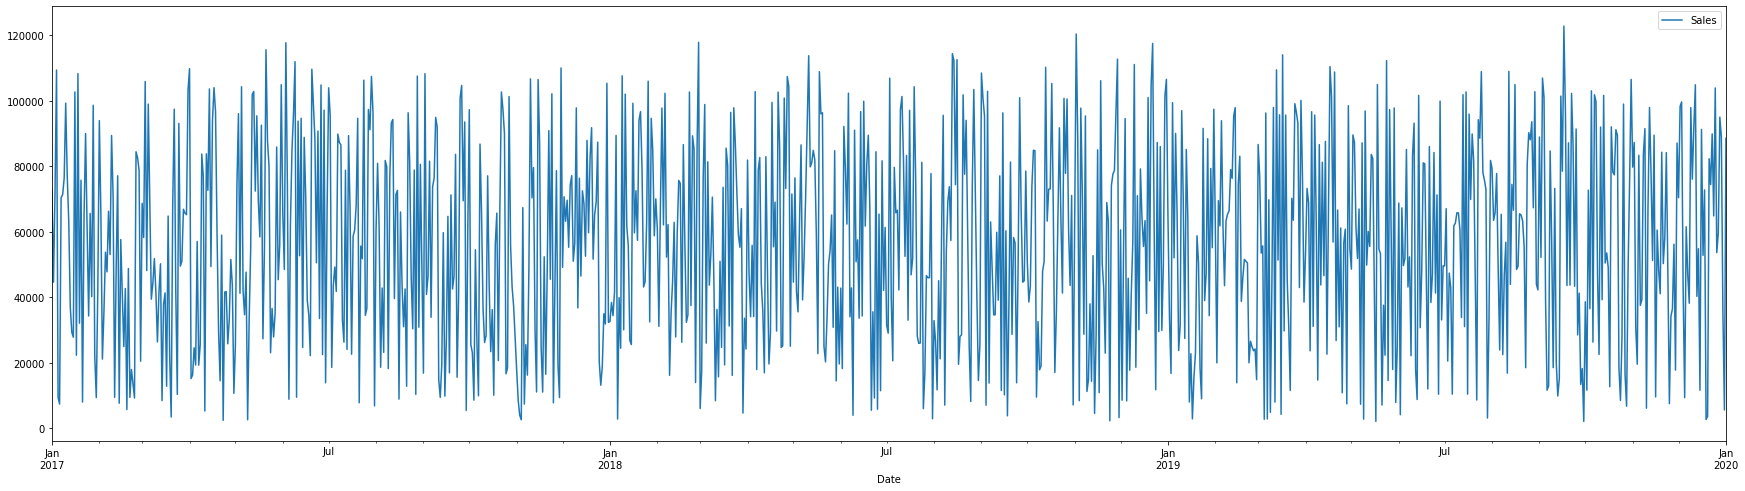

In [6]:
# SaleDate vs TotalSalesValue
DateVsSale=CompleteSales[['Sales_date','Total_Sales_Value']]
DateVsSale.columns=['Date','Sales']
print(DateVsSale.head(5))
DateVsSale['Date']=pd.to_datetime(DateVsSale['Date'])
#Aggregarting Sale Values grouped by date
DateVsSale=DateVsSale.groupby(DateVsSale['Date']).sum()
DateVsSale.plot(figsize=(30,8))

C:\Users\Manimaran KV\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


             Sales      Forecast
Date                            
2019-12-23   89910  55520.563117
2019-12-24   64853  54398.259461
2019-12-25  103964  66313.971365
2019-12-26   53646  50370.385145
2019-12-27   59738  58341.038054
2019-12-28   95045  60377.398320
2019-12-29   88967  55550.911030
2019-12-30   35813  58327.266881
2019-12-31    5582  53129.219568
2020-01-01   88603  61108.412257


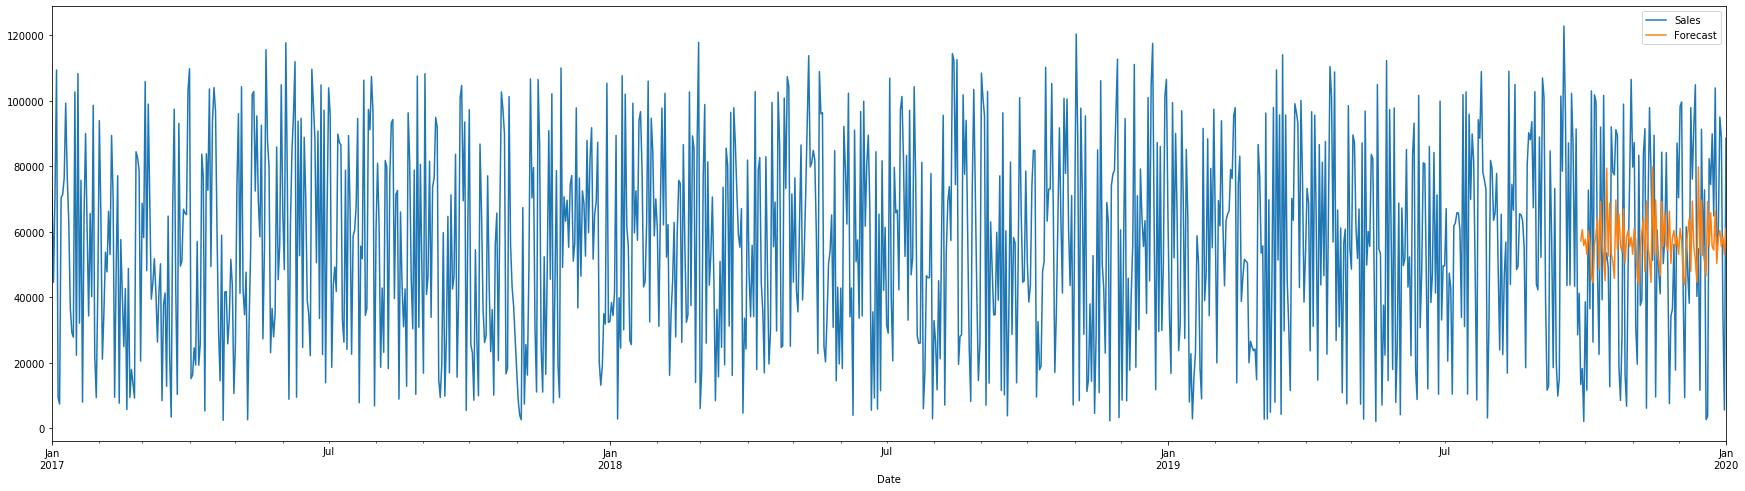

In [34]:
Model=sm.tsa.statespace.SARIMAX(DateVsSale['Sales'],order=(1, 0, 0),seasonal_order=(1,1,1,30))
Result=Model.fit()
DateVsSale['Forecast']=Result.predict(start=1000,end=1096,dynamic=True)
print(DateVsSale.tail(10))
DateVsSale[['Sales','Forecast']].plot(figsize=(30,8))

In [35]:
Sales_Series=DateVsSale['Sales']
Forecast_Series=DateVsSale['Forecast']
MSE_Series=[]
Sum=0

#Calculating the MSE for values after 1000 readings
for i in range(1000,len(Sales_Series)):
    difference=Sales_Series[i] - Forecast_Series[i]
    difference_square=difference**2
    Sum=Sum+difference_square

print('Mean Squared Error:', Sum/(len(Sales_Series)-1000))

Mean Squared Error: 1061751589.9601588
